In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame(
        {
            'Class Path': class_paths,
            'Class': classes
        }
    )

    return df


In [4]:
tr_df = get_class_paths('Training')

In [5]:
tr_df

,Class Path,Class
0,Training\glioma\Tr-glTr_0000.jpg,glioma
1,Training\glioma\Tr-glTr_0001.jpg,glioma
2,Training\glioma\Tr-glTr_0002.jpg,glioma
3,Training\glioma\Tr-glTr_0003.jpg,glioma
4,Training\glioma\Tr-glTr_0004.jpg,glioma
...,...,...
5707,Training\pituitary\Tr-pi_1452.jpg,pituitary
5708,Training\pituitary\Tr-pi_1453.jpg,pituitary
5709,Training\pituitary\Tr-pi_1454.jpg,pituitary
5710,Training\pituitary\Tr-pi_1455.jpg,pituitary


In [6]:
ts_df = get_class_paths('Testing')

In [7]:
ts_df

,Class Path,Class
0,Testing\glioma\Te-glTr_0000.jpg,glioma
1,Testing\glioma\Te-glTr_0001.jpg,glioma
2,Testing\glioma\Te-glTr_0002.jpg,glioma
3,Testing\glioma\Te-glTr_0003.jpg,glioma
4,Testing\glioma\Te-glTr_0004.jpg,glioma
...,...,...
1306,Testing\pituitary\Te-pi_0295.jpg,pituitary
1307,Testing\pituitary\Te-pi_0296.jpg,pituitary
1308,Testing\pituitary\Te-pi_0297.jpg,pituitary
1309,Testing\pituitary\Te-pi_0298.jpg,pituitary


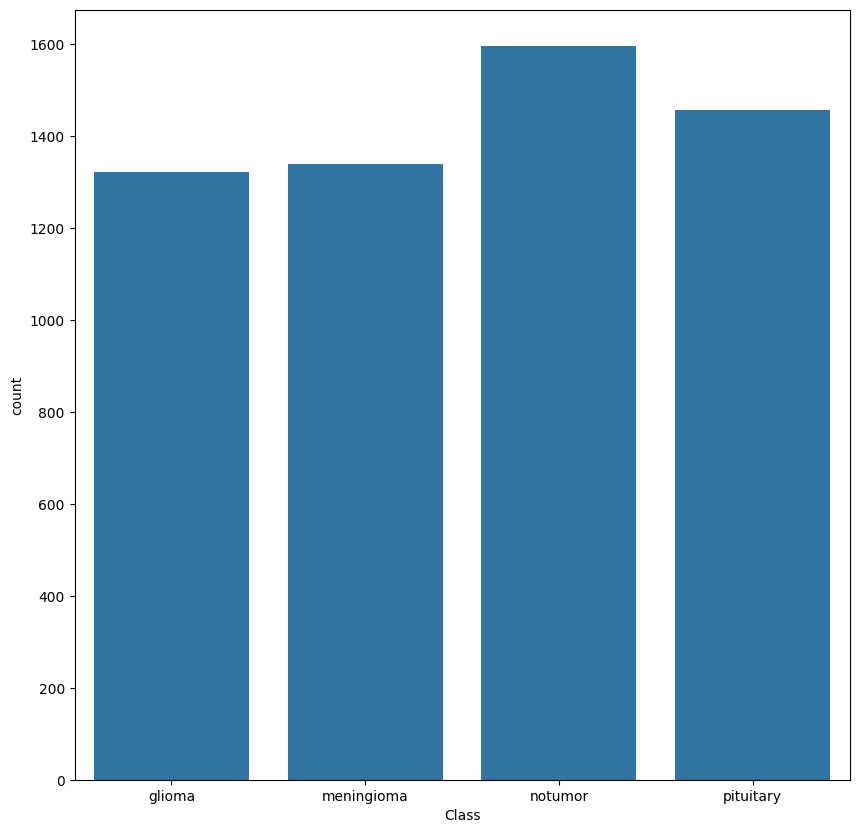

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
ax = sns.countplot(x=tr_df['Class'], data=tr_df)
plt.show()

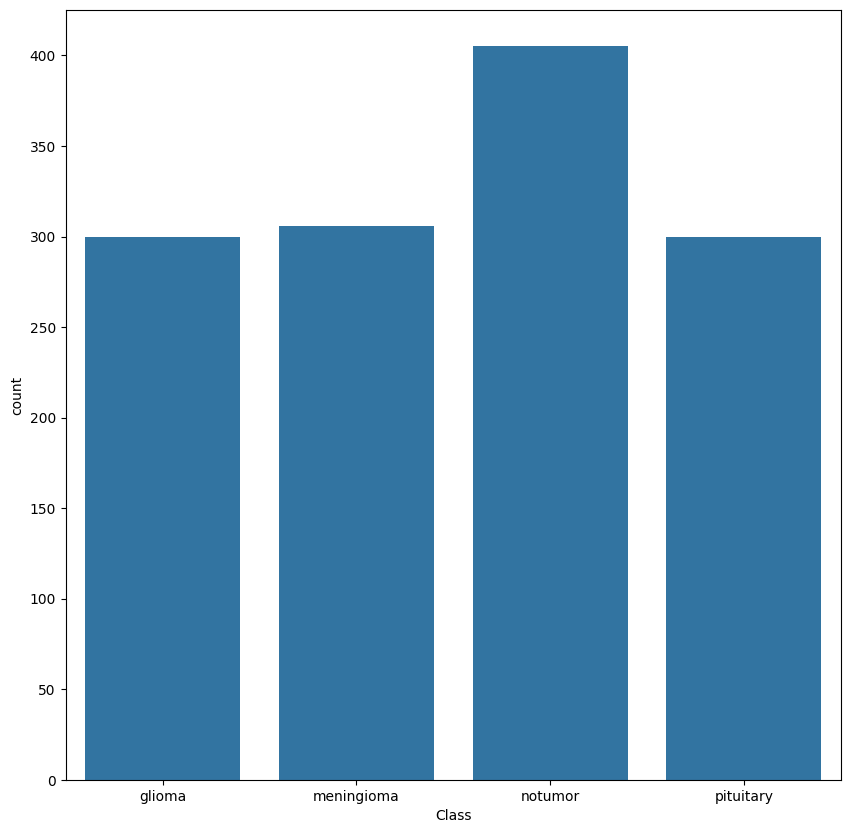

In [9]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x=ts_df['Class'], data=ts_df)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
242,Testing\glioma\Te-gl_0242.jpg,glioma
332,Testing\meningioma\Te-me_0032.jpg,meningioma
1293,Testing\pituitary\Te-pi_0282.jpg,pituitary
1052,Testing\pituitary\Te-pi_0041.jpg,pituitary
910,Testing\notumor\Te-no_0304.jpg,notumor
...,...,...
255,Testing\glioma\Te-gl_0255.jpg,glioma
422,Testing\meningioma\Te-me_0122.jpg,meningioma
18,Testing\glioma\Te-gl_0018.jpg,glioma
1198,Testing\pituitary\Te-pi_0187.jpg,pituitary


In [13]:
ts_df

,Class Path,Class
962,Testing\notumor\Te-no_0356.jpg,notumor
686,Testing\notumor\Te-no_0080.jpg,notumor
1141,Testing\pituitary\Te-pi_0130.jpg,pituitary
234,Testing\glioma\Te-gl_0234.jpg,glioma
547,Testing\meningioma\Te-me_0247.jpg,meningioma
...,...,...
509,Testing\meningioma\Te-me_0209.jpg,meningioma
1217,Testing\pituitary\Te-pi_0206.jpg,pituitary
656,Testing\notumor\Te-no_0050.jpg,notumor
721,Testing\notumor\Te-no_0115.jpg,notumor


In [14]:
batch_size = 32
img_size = (299,299)

image_generator = ImageDataGenerator( rescale=1./255, brightness_range=(0.0,1.2))

ts_gen = ImageDataGenerator(rescale=1./255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    shuffle=False)



Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


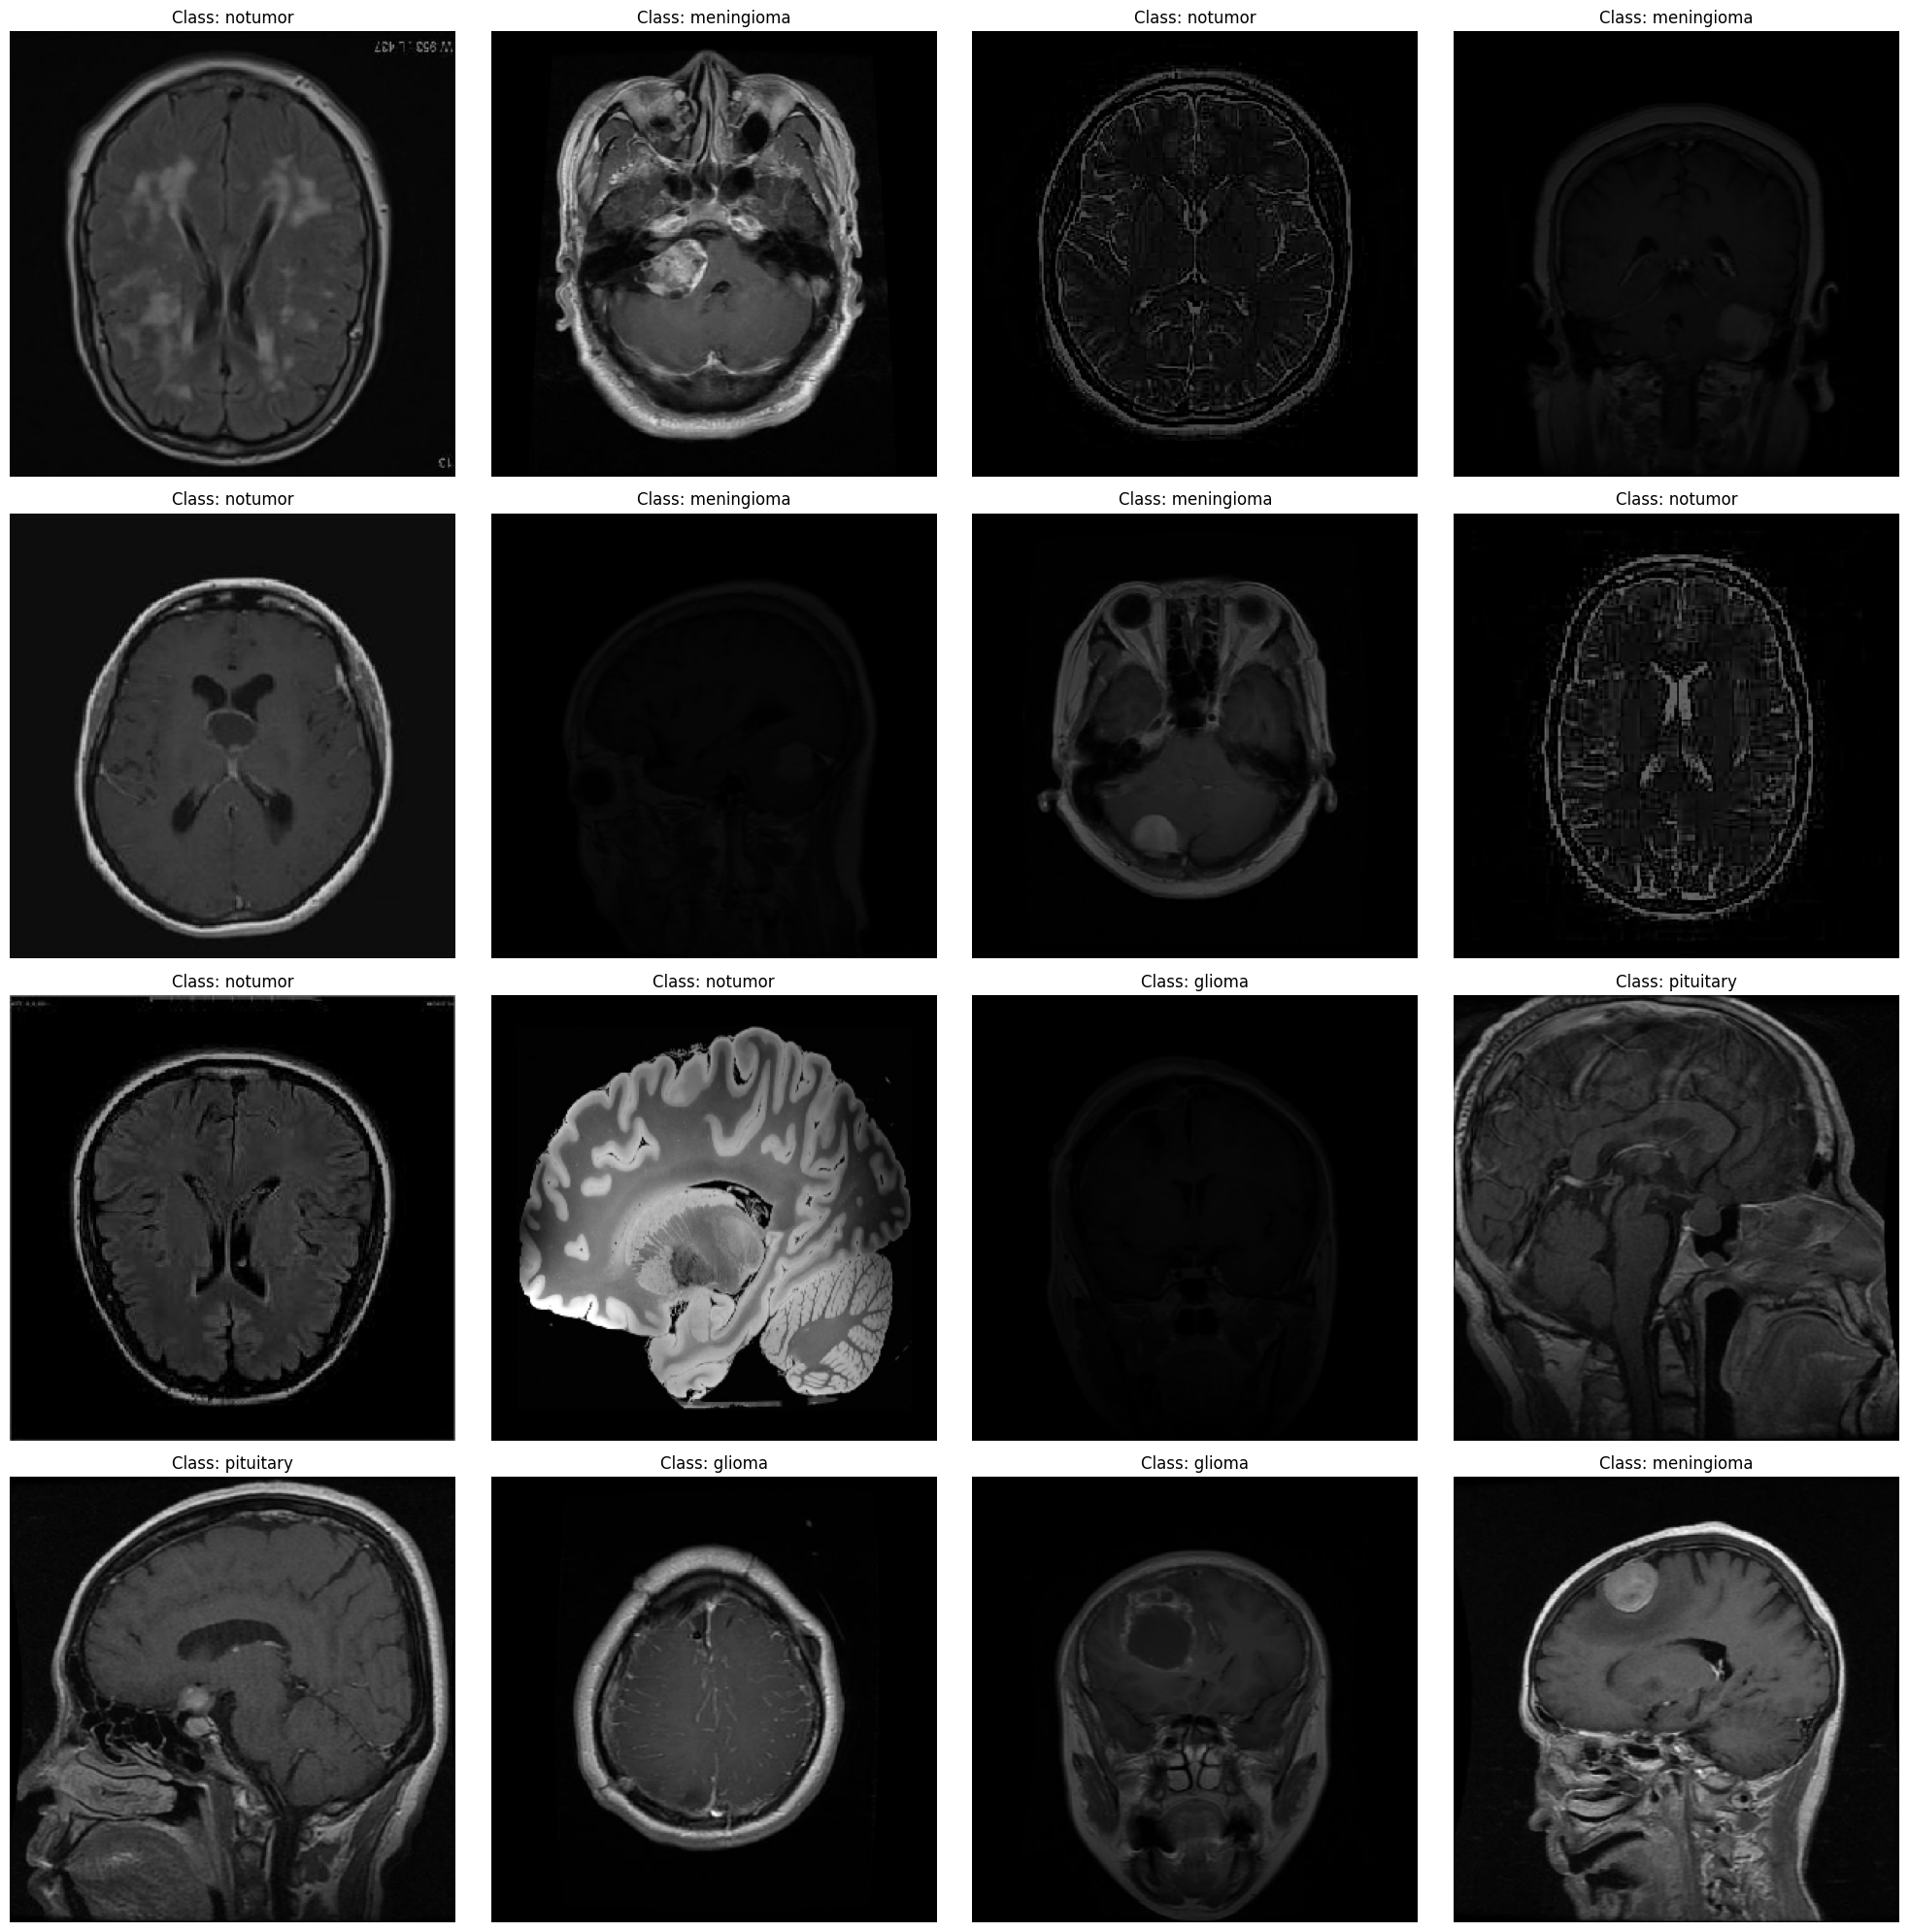

In [16]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [17]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling="max"
)

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.25),
    Dense(4, activation="softmax")
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy", Precision(), Recall()]
)

In [ ]:
hist = model.fit(
    tr_gen,
    epochs=5,
    validation_data=valid_gen
)

Epoch 1/5


C:\Users\Jad\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.6865 - loss: 0.8321 - precision: 0.8025 - recall: 0.5417 - val_accuracy: 0.8641 - val_loss: 0.3652 - val_precision: 0.8982 - val_recall: 0.8489
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 678s 4s/step - accuracy: 0.9573 - loss: 0.1266 - precision: 0.9650 - recall: 0.9490 - val_accuracy: 0.9282 - val_loss: 0.1790 - val_precision: 0.9508 - val_recall: 0.9145
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 680s 4s/step - accuracy: 0.9747 - loss: 0.0679 - precision: 0.9814 - recall: 0.9703 - val_accuracy: 0.9802 - val_loss: 0.0625 - val_precision: 0.9877 - val_recall: 0.9771
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 699s 4s/step - accuracy: 0.9834 - loss: 0.0479 - precision: 0.9894 - recall: 0.9804 - val_accuracy: 0.9771 - val_loss: 0.0747 - val_precision: 0.9816 - val_recall: 0.9756
Epoch 5/5
 67/179 ━━━━━━━━━━━━━━━━━━━━ 6:51 4s/step - accuracy: 0.9904 - loss: 0.0357 - precision: 0.9915 - recall: 0.9886

In [ ]:
# Get training and valid metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Findthe  best epochs and values
best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot our metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'g', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'r', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"\nTrain Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Creating and displaying the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.values())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(12, 6))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.array(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(1, 2, 2)
    bars = plt.bar(labels, probabilities)
    plt.xlabel("Classes", fontsize=15)
    plt.ylabel("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")


In [ ]:
predict('/content/Testing/meningioma/Te-meTr_0000.jpg')

In [ ]:
predict('/content/Testing/notumor/Te-meTr_0000.jpg')

In [ ]:
predict('/content/Testing/meningioma/Te-meTr_0005.jpg')

In [ ]:
predict('/content/Testing/notumor/Te-meTr_0005.jpg')

In [ ]:
model.save_weights('xception_model.weights.h5')

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

batch_size = 32
img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    tr_df, x_col="Class Path",
    y_col="Class",
    batch_size=batch_size,
    target_size=img_size
)

valid_gen = image_generator.flow_from_dataframe(
    valid_df, x_col="Class Path",
    y_col="Class",
    batch_size=batch_size,
    target_size=img_size
)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df, x_col="Class Path",
    y_col="Class",
    batch_size=16,
    target_size=img_size, shuffle=False
)


In [ ]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))  # Output layer with 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()


In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)   

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

In [ ]:
cnn_model.save("cnn_model.h5")

PART 2: STREAMLIT WEB APP

In [ ]:
! pip install steamlit pyngrok python-dataenv

In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py

import streamlit as st

st.title("Brain Tumor Classification with Neural Networks")

st.write("Upload and image of a brain MRI to classify whether it contains a tumor or not.")

In [ ]:
thread = Thread(target=run_steamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tks=True)

print("Public URL:", public_url)